In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
seeds = pd.read_csv('MNCAATourneySeeds.csv')
conferences = pd.read_csv('MTeamConferences.csv')

reg_details = pd.read_csv('MRegularSeasonDetailedResults.csv')
tourney_compact = pd.read_csv('MRegularSeasonCompactResults.csv')
display(reg_details)

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2003,10,1104,68,1328,62,N,0,27,58,...,10,16,22,10,22,8,18,9,2,20
1,2003,10,1272,70,1393,63,N,0,26,62,...,24,9,20,20,25,7,12,8,6,16
2,2003,11,1266,73,1437,61,N,0,24,58,...,26,14,23,31,22,9,12,2,5,23
3,2003,11,1296,56,1457,50,N,0,18,38,...,22,8,15,17,20,9,19,4,3,23
4,2003,11,1400,77,1208,71,N,0,30,61,...,16,17,27,21,15,12,10,7,1,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106829,2023,113,1403,74,1328,63,A,0,29,47,...,33,12,15,6,13,13,8,10,1,12
106830,2023,113,1405,84,1103,63,H,0,32,61,...,21,7,14,9,23,10,10,3,0,11
106831,2023,113,1429,65,1461,55,A,0,21,51,...,23,15,20,7,25,6,11,6,3,19
106832,2023,113,1433,88,1386,63,A,0,31,59,...,28,13,18,5,20,10,11,3,3,15


In [5]:
display(reg_details.columns.values)

array(['Season', 'DayNum', 'WTeamID', 'WScore', 'LTeamID', 'LScore',
       'WLoc', 'NumOT', 'WFGM', 'WFGA', 'WFGM3', 'WFGA3', 'WFTM', 'WFTA',
       'WOR', 'WDR', 'WAst', 'WTO', 'WStl', 'WBlk', 'WPF', 'LFGM', 'LFGA',
       'LFGM3', 'LFGA3', 'LFTM', 'LFTA', 'LOR', 'LDR', 'LAst', 'LTO',
       'LStl', 'LBlk', 'LPF'], dtype=object)

In [6]:
### We want a single line associated with a season and a team ID
## Only really care about winning team so we remove 'W' in front of stats to be left with that
## Summary of stats over entire season matters
## OppPoints show how many winning team gave up
## Loc includes insight on whether there is a home court advantage


win_teams = pd.DataFrame()
lose_teams = pd.DataFrame()

columns = ['Season', 'TeamID', 'Points', 'OppPoints',
       'Loc', 'NumOT', 'FGM', 'FGA', 'FGM3', 'FGA3', 'FTM', 'FTA',
       'OR', 'DR', 'Ast', 'TO', 'Stl', 'Blk', 'PF', 'OppFGM', 'OppFGA',
       'OppFGM3', 'OppFGA3', 'OppFTM', 'OppFTA', 'OppOR', 'OppDR', 'OppAst', 'OppTO',
       'OppStl', 'OppBlk', 'OppPF']

#create dataframe and pass in columns
win_teams[columns] = reg_details[['Season', 'WTeamID', 'WScore', 'LScore',
       'WLoc', 'NumOT', 'WFGM', 'WFGA', 'WFGM3', 'WFGA3', 'WFTM', 'WFTA',
       'WOR', 'WDR', 'WAst', 'WTO', 'WStl', 'WBlk', 'WPF', 'LFGM', 'LFGA',
       'LFGM3', 'LFGA3', 'LFTM', 'LFTA', 'LOR', 'LDR', 'LAst', 'LTO',
       'LStl', 'LBlk', 'LPF']]


## Keeping track where TeamID wins or loses with binary 1 or 0
win_teams['Wins'] = 1
win_teams['Losses'] = 0
##create dataframe and pass in columns
lose_teams[columns] = reg_details[['Season', 'LTeamID', 'LScore', 'WScore',
       'WLoc', 'NumOT', 'LFGM', 'LFGA', 'LFGM3', 'LFGA3', 'LFTM', 'LFTA',
       'LOR', 'LDR', 'LAst', 'LTO', 'LStl', 'LBlk', 'LPF', 'WFGM', 'WFGA',
       'WFGM3', 'WFGA3', 'WFTM', 'WFTA', 'WOR', 'WDR', 'WAst', 'WTO',
       'WStl', 'WBlk', 'WPF']]
### no such thing as lose location, define func to swap. Below is if winner was playing home
### for example, it would return away for the loser
def change_loc(loc):
    if loc == 'H':
        return 'A'
    elif loc == 'A':
        return 'H'
    else:
        return 'N'
  
## runs thru entire dataframe for this column and flips home and away
lose_teams['Loc'] = lose_teams['Loc'].apply(change_loc)

## Keeping track where TeamID wins or loses with binary 1 or 0, in this case the loser
lose_teams['Wins'] = 0
lose_teams['Losses'] = 1


win_lose_teams = pd.concat([win_teams, lose_teams])

#sum up all the points/stats for each team, grouped by season
combined_teams = win_lose_teams.groupby(['Season', 'TeamID']).sum()
#Need num of games to make field goals (baskets) made relative
combined_teams['NumGames'] = combined_teams['Wins'] + combined_teams['Losses']
display(combined_teams)

Points  OppPoints  NumOT  FGM   FGA  FGM3  FGA3  FTM  FTA   OR  \
Season TeamID                                                                   
2003   1102      1603       1596      0  536  1114   219   583  312  479  117   
       1103      2127       2110      8  733  1508   147   434  514  698  264   
       1104      1940       1820      1  673  1601   178   556  416  586  380   
       1105      1866       1993      4  634  1602   197   540  401  568  351   
       1106      1781       1785      1  656  1548   171   494  298  461  344   
...               ...        ...    ...  ...   ...   ...   ...  ...  ...  ...   
2023   1473      1694       1924      2  619  1477   188   530  268  369  177   
       1474      2012       1986      0  683  1546   242   692  404  555  247   
       1475      1973       1995      3  682  1587   254   677  355  524  264   
       1476      1940       2058      3  670  1534   222   632  378  495  147   
       1477      1936       2044      4  702  1589   225   730  307  444  215   

               ...  OppOR  OppDR  OppAst  OppTO  OppStl  OppBlk  OppPF  Wins  \
Season TeamID  ...                                                             
2003   1102    ...    269    564     256    363     152      44    514    12   
       1103    ...    325    595     418    414     173      77    606    13   
       1104    ...    305    634     327    388     155      89    539    17   
       1105    ...    343    686     411    489     244     109    496     7   
       1106    ...    317    626     330    422     246      89    452    13   
...            ...    ...    ...     ...    ...     ...     ...    ...   ...   
2023   1473    ...    240    654     388    305     186      82    374     6   
       1474    ...    216    619     359    274     169     107    463    14   
       1475    ...    191    616     335    298     164     110    480    12   
       1476    ...    276    710     408    372     202      86    478    13   
       1477    ...    222    648     360    330     180      66    455    11   

               Losses  NumGames  
Season TeamID                    
2003   1102        16        28  
       1103        14        27  
       1104        11        28  
       1105        19        26  
       1106        15        28  
...               ...       ...  
2023   1473        20        26  
       1474        12        26  
       1475        14        26  
       1476        16        29  
       1477        17        28  

[7255 rows x 32 columns]

In [7]:
display(combined_teams.columns.values)

array(['Points', 'OppPoints', 'NumOT', 'FGM', 'FGA', 'FGM3', 'FGA3',
       'FTM', 'FTA', 'OR', 'DR', 'Ast', 'TO', 'Stl', 'Blk', 'PF',
       'OppFGM', 'OppFGA', 'OppFGM3', 'OppFGA3', 'OppFTM', 'OppFTA',
       'OppOR', 'OppDR', 'OppAst', 'OppTO', 'OppStl', 'OppBlk', 'OppPF',
       'Wins', 'Losses', 'NumGames'], dtype=object)

In [8]:
## Creating features for ML

reg_season_input = pd.DataFrame()

## Win ratio is useful, greater than .5 if you're a winning team

reg_season_input['WinRatio'] = combined_teams['Wins'] / combined_teams['NumGames']
reg_season_input['PointsPerGame'] = combined_teams['Points'] / combined_teams['NumGames']
reg_season_input['PointsAllowedPerGame'] = combined_teams['OppPoints'] / combined_teams['NumGames']
# If points ration is higher than 1 if you're outscoring opponents
reg_season_input['PointsRatio'] = combined_teams['Points'] / combined_teams['OppPoints']

reg_season_input['OTsPerGame'] = combined_teams['NumOT'] / combined_teams['NumGames']

## More Stats
reg_season_input['FGpergame'] = combined_teams['FGM'] / combined_teams['NumGames']
## How often FGs are converted / made
reg_season_input['FGRatio'] = combined_teams['FGM'] / combined_teams['FGA']
reg_season_input['FGAllowed'] = combined_teams['OppFGM'] / combined_teams['NumGames']


##For 3 pointers
reg_season_input['FG3pergame'] = combined_teams['FGM3'] / combined_teams['NumGames']
## How often FG3s are converted / made
reg_season_input['FG3Ratio'] = combined_teams['FGM3'] / combined_teams['FGA3']
reg_season_input['FG3Allowed'] = combined_teams['OppFGM3'] / combined_teams['NumGames']

##For free throws
reg_season_input['FTpergame'] = combined_teams['FTM'] / combined_teams['NumGames']
## How often FTs are converted / made
reg_season_input['FTRatio'] = combined_teams['FTM'] / combined_teams['FTA']
reg_season_input['FTAllowed'] = combined_teams['OppFTM'] / combined_teams['NumGames']

## Rebound Stats
reg_season_input['ORRatio'] = combined_teams['OR'] / (combined_teams['OR'] + combined_teams['OppDR'])
reg_season_input['DRRatio'] = combined_teams['DR'] / (combined_teams['DR'] + combined_teams['OppOR'])
reg_season_input['ASTPerGame'] = combined_teams['Ast'] / combined_teams['NumGames']

## Defense Stats
reg_season_input['TOPerGame'] = combined_teams['TO'] / combined_teams['NumGames']
reg_season_input['StlPerGame'] = combined_teams['Stl'] / combined_teams['NumGames']
reg_season_input['BlkPerGame'] = combined_teams['Blk'] / combined_teams['NumGames']
reg_season_input['PFPerGame'] = combined_teams['PF'] / combined_teams['NumGames']




display(reg_season_input)

WinRatio  PointsPerGame  PointsAllowedPerGame  PointsRatio  \
Season TeamID                                                               
2003   1102    0.428571      57.250000             57.000000     1.004386   
       1103    0.481481      78.777778             78.148148     1.008057   
       1104    0.607143      69.285714             65.000000     1.065934   
       1105    0.269231      71.769231             76.653846     0.936277   
       1106    0.464286      63.607143             63.750000     0.997759   
...                 ...            ...                   ...          ...   
2023   1473    0.230769      65.153846             74.000000     0.880457   
       1474    0.538462      77.384615             76.384615     1.013092   
       1475    0.461538      75.884615             76.730769     0.988972   
       1476    0.448276      66.896552             70.965517     0.942663   
       1477    0.392857      69.142857             73.000000     0.947162   

               OTsPerGame  FGpergame   FGRatio  FGAllowed  FG3pergame  \
Season TeamID                                                           
2003   1102      0.000000  19.142857  0.481149  19.285714    7.821429   
       1103      0.296296  27.148148  0.486074  27.777778    5.444444   
       1104      0.035714  24.035714  0.420362  23.250000    6.357143   
       1105      0.153846  24.384615  0.395755  27.000000    7.576923   
       1106      0.035714  23.428571  0.423773  21.714286    6.107143   
...                   ...        ...       ...        ...         ...   
2023   1473      0.076923  23.807692  0.419093  26.230769    7.230769   
       1474      0.000000  26.269231  0.441785  28.769231    9.307692   
       1475      0.115385  26.230769  0.429742  26.038462    9.769231   
       1476      0.103448  23.103448  0.436767  25.655172    7.655172   
       1477      0.142857  25.071429  0.441787  25.678571    8.035714   

               FG3Ratio  ...  FTpergame   FTRatio  FTAllowed   ORRatio  \
Season TeamID            ...                                             
2003   1102    0.375643  ...  11.142857  0.651357  13.678571  0.171806   
       1103    0.338710  ...  19.037037  0.736390  15.925926  0.307334   
       1104    0.320144  ...  14.857143  0.709898  12.142857  0.374753   
       1105    0.364815  ...  15.423077  0.705986  16.384615  0.338476   
       1106    0.346154  ...  10.642857  0.646421  15.535714  0.354639   
...                 ...  ...        ...       ...        ...       ...   
2023   1473    0.354717  ...  10.307692  0.726287  12.615385  0.212996   
       1474    0.349711  ...  15.538462  0.727928  10.884615  0.285219   
       1475    0.375185  ...  13.653846  0.677481  16.730769  0.300000   
       1476    0.351266  ...  13.034483  0.763636  11.344828  0.171529   
       1477    0.308219  ...  10.964286  0.691441  14.821429  0.249131   

                DRRatio  ASTPerGame  TOPerGame  StlPerGame  BlkPerGame  \
Season TeamID                                                            
2003   1102    0.636486   13.000000  11.428571    5.964286    1.785714   
       1103    0.623407   15.222222  12.629630    7.259259    2.333333   
       1104    0.687179   12.107143  13.285714    6.607143    3.785714   
       1105    0.636653   14.538462  18.653846    9.307692    2.076923   
       1106    0.678173   11.678571  17.035714    8.357143    3.142857   
...                 ...         ...        ...         ...         ...   
2023   1473    0.711191   11.153846  12.615385    5.576923    3.384615   
       1474    0.745882   13.461538  11.884615    6.153846    2.461538   
       1475    0.769880   12.615385  12.653846    6.538462    2.115385   
       1476    0.705443   12.000000  12.758621    6.931034    2.931034   
       1477    0.728606   13.857143  12.392857    5.642857    2.928571   

               PFPerGame  
Season TeamID             
2003   1102    18.750000  
       1103    19.851852  
       1104    18.035714  
  

In [9]:
## Check that data is not spread i.e. min = 0.000000001 and max = 1000.0000
display(reg_season_input.describe())

,WinRatio,PointsPerGame,PointsAllowedPerGame,PointsRatio,OTsPerGame,FGpergame,FGRatio,FGAllowed,FG3pergame,FG3Ratio,...,FTpergame,FTRatio,FTAllowed,ORRatio,DRRatio,ASTPerGame,TOPerGame,StlPerGame,BlkPerGame,PFPerGame
count,7255.000000,7255.000000,7255.000000,7255.000000,7255.000000,7255.000000,7255.000000,7255.000000,7255.000000,7255.000000,...,7255.000000,7255.000000,7255.000000,7255.000000,7255.000000,7255.000000,7255.000000,7255.000000,7255.000000,7255.000000
mean,0.494234,69.517710,69.728255,1.001189,0.068626,24.467956,0.436205,24.537142,6.707053,0.342758,...,13.874745,0.697934,13.933499,0.306738,0.691745,13.023133,13.467090,6.483215,3.300033,17.784820
std,0.187374,5.791130,5.509195,0.095861,0.059716,2.158154,0.026302,2.201628,1.395644,0.028570,...,2.139746,0.039371,2.201984,0.047336,0.039265,1.853022,1.851266,1.252166,1.079999,3.412132
min,0.000000,49.240000,50.428571,0.625313,0.000000,16.120000,0.342072,16.962963,1.838710,0.247772,...,7.000000,0.542461,7.433333,0.124726,0.554890,7.518519,7.387097,2.875000,0.655172,0.000000
25%,0.357143,65.600000,66.030777,0.935241,0.031250,23.000000,0.418587,23.000000,5.725705,0.323339,...,12.387097,0.671674,12.379310,0.275459,0.664169,11.724138,12.200000,5.587221,2.518519,16.903226
50%,0.500000,69.483871,69.592593,0.997517,0.062500,24.437500,0.436421,24.468750,6.625000,0.342149,...,13.833333,0.698885,13.827586,0.309831,0.689423,12.906250,13.343750,6.392857,3.187500,18.285714
75%,0.633333,73.350496,73.219807,1.063951,0.100000,25.880000,0.453654,25.958333,7.612903,0.362018,...,15.300000,0.725018,15.372685,0.340109,0.718048,14.250000,14.633333,7.258065,3.935484,19.593750
max,1.000000,95.551724,98.206897,1.388011,0.400000,34.153846,0.550868,37.200000,13.250000,0.450602,...,21.484848,0.825641,23.518519,0.453014,0.826561,21.484848,22.321429,13.241379,9.333333,27.884615


In [10]:
# Check there aren't any NotaNum in dataset
#display(reg_season_input.isna().sum())

In [11]:
## Kaggle divides the data into 4 quadrants (W, X, Y, Z)
## 1 - 16 for each team in each conference 
## Winner of each conference competes for championship title

display(seeds)

,Season,Seed,TeamID
0,1985,W01,1207
1,1985,W02,1210
2,1985,W03,1228
3,1985,W04,1260
4,1985,W05,1374
...,...,...,...
2417,2022,Z13,1151
2418,2022,Z14,1255
2419,2022,Z15,1174
2420,2022,Z16a,1136


In [12]:
## Analyzing tournament data, win data doesnt matter bc thats what we're predicting
## Only really need season, winning team, and losing team

display(tourney_compact)

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,20,1228,81,1328,64,N,0
1,1985,25,1106,77,1354,70,H,0
2,1985,25,1112,63,1223,56,H,0
3,1985,25,1165,70,1432,54,H,0
4,1985,25,1192,86,1447,74,H,0
...,...,...,...,...,...,...,...,...
180877,2023,113,1403,74,1328,63,A,0
180878,2023,113,1405,84,1103,63,H,0
180879,2023,113,1429,65,1461,55,A,0
180880,2023,113,1433,88,1386,63,A,0


In [60]:
## Compare stats of all teams via Seeds
## Doesnt really matter which quadrant/conference the team is in 
# When each plays off, they may have same value just with A and B appended, doesnt matter either


seed_dict = seeds.set_index(['Season', 'TeamID'])
display(seed_dict)
print(type(seed_dict))


Seed
Season TeamID      
1985   1207     W01
       1210     W02
       1228     W03
       1260     W04
       1374     W05
...             ...
2022   1151     Z13
       1255     Z14
       1174     Z15
       1136    Z16a
       1460    Z16b

[2422 rows x 1 columns]

<class 'pandas.core.frame.DataFrame'>


In [66]:

tourney_input = pd.DataFrame()

winIDs = tourney_compact['WTeamID']
loseIDs = tourney_compact['LTeamID']
season = tourney_compact['Season']

winners = pd.DataFrame()
## Model would be biased if Team1 was the winner every time
winners[['Season', 'Team1', 'Team2']] = tourney_compact[['Season', 'WTeamID', 'LTeamID']]
#Preserve winners for ideal result; finds out if first ID won or lost
winners['Result'] = 1

losers = pd.DataFrame()
losers[['Season', 'Team1', 'Team2']] = tourney_compact[['Season', 'LTeamID', 'WTeamID']]
losers['Result'] = 0

tourney_input = pd.concat([winners, losers])
## Match up the seasons by selecting those seasons and resetting index accordingly
tourney_input = tourney_input[tourney_input['Season']>=2003].reset_index(drop=True)

## Knowing the Seed can strongly correlate to if a team will win or not, even 
## though upsets do occur

############################# 
#Skipping seed as a feature for this model

# team1seeds = []
# team2seeds = []

# for x in range(len(tourney_input)):
#     idx = (tourney_input['Season'][x], tourney_input['Team1'][x])
#     try:
#         seed = seed_dict.loc[idx].values[0]
#     except KeyError:
#         pass
    
#     if len(seed) == 4:
#         seed = seed[1:-1]
#     else:
#        seed = seed[1:]
#     team1seeds.append(seed)

#     idx = (tourney_input['Season'][x], tourney_input['Team2'][x])
#     try:
#         seed = seed_dict.loc[idx].values[0]
#     except KeyError:
#         pass
    
#     if seed == 4:
#         seed = seed[1:-1]
#     else:
#        seed = seed[1:]
#     team2seeds.append(seed)

    

# tourney_input['Team1Seed'] = team1seeds
# tourney_input['Team12Seed'] = team2seeds


display(tourney_input)





,Season,Team1,Team2,Result
0,2003,1104,1328,1
1,2003,1272,1393,1
2,2003,1266,1437,1
3,2003,1296,1457,1
4,2003,1400,1208,1
...,...,...,...,...
213663,2023,1328,1403,0
213664,2023,1103,1405,0
213665,2023,1461,1429,0
213666,2023,1386,1433,0


In [68]:
output_scores = []

for x in range(len(tourney_input)):
    idx = (tourney_input['Season'][x], tourney_input['Team1'][x])
    team1score = reg_season_input.loc[idx]

    idx = (tourney_input['Season'][x], tourney_input['Team2'][x])
    team2score = reg_season_input.loc[idx]
    
    outscore = team1score - team2score
    outscore['Result'] = tourney_input['Result'][x]
    output_scores.append(outscore)

output_scores = pd.DataFrame(output_scores)

display(output_scores)
display(output_scores.describe())




,WinRatio,PointsPerGame,PointsAllowedPerGame,PointsRatio,OTsPerGame,FGpergame,FGRatio,FGAllowed,FG3pergame,FG3Ratio,...,FTRatio,FTAllowed,ORRatio,DRRatio,ASTPerGame,TOPerGame,StlPerGame,BlkPerGame,PFPerGame,Result
0,-0.192857,-1.880952,4.833333,-0.116891,-0.064286,-1.230952,-0.026572,1.650000,-1.109524,-0.073529,...,0.002012,-0.390476,0.023402,-0.018758,-2.059524,1.485714,-0.326190,0.019048,-0.564286,1.0
1,-0.034483,-5.586207,-4.068966,-0.014022,0.000000,-2.965517,-0.032135,-1.931034,1.758621,0.018362,...,-0.039816,0.827586,-0.017514,0.047719,1.655172,0.172414,-0.931034,-2.206897,2.172414,1.0
2,0.321429,6.192857,-2.421429,0.128354,-0.030952,2.380952,0.063381,0.488095,-0.880952,0.030351,...,0.057471,-2.845238,0.022797,-0.020209,3.254762,-2.461905,-1.500000,0.242857,-2.257143,1.0
3,-0.094470,0.184332,3.413594,-0.048496,0.057604,0.033410,0.026860,0.658986,-0.781106,0.031417,...,0.016976,1.714286,0.057130,0.006820,0.070276,2.357143,0.005760,-1.779954,0.163594,1.0
4,0.082011,-0.328042,-4.506614,0.066222,-0.075397,-0.518519,-0.015622,-2.161376,-0.846561,-0.031316,...,0.000674,0.486772,0.073203,0.013625,-3.425926,1.873016,-1.236772,-0.513228,3.171958,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213663,-0.107143,-5.714286,0.000000,-0.083814,0.000000,-1.214286,-0.000609,0.964286,-0.250000,0.003017,...,0.011072,0.785714,-0.087960,0.019096,0.071429,-0.428571,-1.928571,-0.178571,0.464286,0.0
213664,-0.123932,-11.961538,-9.652422,-0.019557,0.038462,-4.820513,-0.052764,-3.618234,-0.056980,-0.048877,...,-0.025158,-0.847578,0.023126,0.060885,-1.792023,0.991453,-0.820513,-0.162393,-0.531339,0.0
213665,-0.480769,-9.543956,1.277473,-0.153462,0.002747,-2.851648,-0.033088,0.324176,-0.906593,-0.046915,...,-0.063991,-0.351648,-0.031129,-0.015745,-5.774725,0.118132,-0.131868,-1.041209,-1.082418,0.0
213666,-0.285714,1.500000,9.678571,-0.129125,0.071429,0.642857,-0.031571,2.892857,2.678571,-0.004525,...,-0.026406,1.464286,0.001844,-0.018701,-0.428571,-0.892857,-2.714286,-1.214286,1.785714,0.0


,WinRatio,PointsPerGame,PointsAllowedPerGame,PointsRatio,OTsPerGame,FGpergame,FGRatio,FGAllowed,FG3pergame,FG3Ratio,...,FTRatio,FTAllowed,ORRatio,DRRatio,ASTPerGame,TOPerGame,StlPerGame,BlkPerGame,PFPerGame,Result
count,2.136680e+05,2.136680e+05,2.136680e+05,2.136680e+05,2.136680e+05,2.136680e+05,2.136680e+05,2.136680e+05,2.136680e+05,2.136680e+05,...,2.136680e+05,2.136680e+05,2.136680e+05,2.136680e+05,2.136680e+05,2.136680e+05,2.136680e+05,2.136680e+05,2.136680e+05,213668.000000
mean,-1.104050e-17,-2.192138e-16,-2.447533e-17,-4.622379e-18,2.286248e-20,1.090748e-16,4.821906e-19,-2.766776e-17,-9.843339e-18,6.526200e-19,...,2.265464e-19,-3.564885e-17,2.909771e-19,-4.156815e-19,-4.682237e-17,-4.096957e-17,-2.048479e-17,-2.726871e-17,-2.367722e-17,0.500000
std,2.576435e-01,7.334905e+00,6.858625e+00,1.293531e-01,7.838753e-02,2.706260e+00,3.507350e-02,2.798335e+00,1.792205e+00,3.836650e-02,...,5.203005e-02,2.806350e+00,5.390655e-02,3.922226e-02,2.446996e+00,2.101093e+00,1.661671e+00,1.444746e+00,2.373212e+00,0.500001
min,-9.363636e-01,-4.519458e+01,-4.488547e+01,-6.377721e-01,-4.000000e-01,-1.592118e+01,-1.595365e-01,-1.804803e+01,-8.663793e+00,-1.782272e-01,...,-2.440343e-01,-1.317097e+01,-2.426841e-01,-1.749723e-01,-1.222678e+01,-9.896552e+00,-8.047831e+00,-7.794118e+00,-1.218750e+01,0.000000
25%,-1.795699e-01,-4.869706e+00,-4.487924e+00,-8.587533e-02,-4.000000e-02,-1.790806e+00,-2.339091e-02,-1.838710e+00,-1.187500e+00,-2.587780e-02,...,-3.497355e-02,-1.875000e+00,-3.565198e-02,-2.629528e-02,-1.622984e+00,-1.374763e+00,-1.093750e+00,-9.310345e-01,-1.581720e+00,0.000000
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.500000
75%,1.795699e-01,4.869706e+00,4.487924e+00,8.587533e-02,4.000000e-02,1.790806e+00,2.339091e-02,1.838710e+00,1.187500e+00,2.587780e-02,...,3.497355e-02,1.875000e+00,3.565198e-02,2.629528e-02,1.622984e+00,1.374763e+00,1.093750e+00,9.310345e-01,1.581720e+00,1.000000
max,9.363636e-01,4.519458e+01,4.488547e+01,6.377721e-01,4.000000e-01,1.592118e+01,1.595365e-01,1.804803e+01,8.663793e+00,1.782272e-01,...,2.440343e-01,1.317097e+01,2.426841e-01,1.749723e-01,1.222678e+01,9.896552e+00,8.047831e+00,7.794118e+00,1.218750e+01,1.000000


WinRatio                0.54
PointsPerGame           0.35
PointsAllowedPerGame    0.31
PointsRatio             0.52
OTsPerGame              0.01
FGpergame               0.32
FGRatio                 0.37
FGAllowed               0.24
FG3pergame              0.13
FG3Ratio                0.25
FG3Allowed              0.16
FTpergame               0.21
FTRatio                 0.15
FTAllowed               0.21
ORRatio                 0.20
DRRatio                 0.22
ASTPerGame              0.30
TOPerGame               0.25
StlPerGame              0.13
BlkPerGame              0.19
PFPerGame               0.16
Result                  1.00
Name: Result, dtype: float64

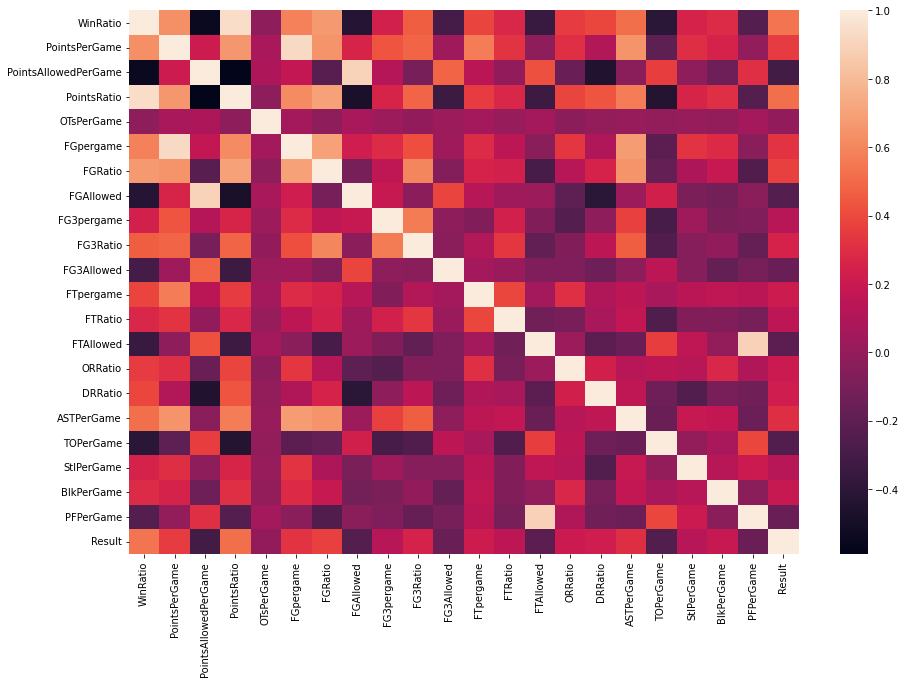

In [70]:
corrs = round(output_scores.corr(), 2)
display(np.abs(corrs['Result']))

import seaborn as sns


### The results line is most important to check which features are most relevant
plt.figure(figsize=(15,10))
sns.heatmap(corrs)
plt.show()



In [72]:
#Splitting data
X = output_scores[output_scores.columns[:-1]].values
y = output_scores['Result'].values

np.random.seed(1)
#Takes len of X and mixes them up
idx = np.random.permutation(len(X))

## .2 bc we want 20% of the data
## negative to get everything up until that point
## int bc we're referencing the indice
train_idx = idx[:int(-.2*len(X))]
test_idx = idx[int(-.2*len(X)):]

X_train = X[train_idx]
X_test = X[test_idx]
y_train = y[train_idx]
y_test = y[test_idx]


print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(170935, 21) (42733, 21) (170935,) (42733,)


In [73]:
## This normalization min/max scaling must be done after splitting the data so there
## is no cheating in the model
mins = X_train.min(axis=0)
maxs = X_train.max(axis=0)

# Takes mins and maxs from train and applying those same nums to test data
X_train = (X_train - mins) / (maxs - mins)
X_test = (X_test - mins) / (maxs - mins)


In [74]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=1)
model = model.fit(X_train, y_train)
model.score(X_test, y_test)


0.6824702220766152